In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
#skleaarn- scikit learn library
#linear_model- module in sklearn - used when input and output variables have linear relationship
#ensemble- module in sklearn- multiple models are combined
#xgboost-extreme gradient boosting
#model_selection- used to import the necessary functions as train_test_split, func for cross validation etc

df = pd.read_csv("diabetes_dataset.csv") #load tha dataset

X = df.drop("Diabetes_binary", axis=1) # drop Diabetes_binary rest all are input features
#axis=1 -> drops column without affecting rows
y = df["Diabetes_binary"] #Diabetes_binary is target variable

scaler = StandardScaler()
X[["BMI", "Age"]] = scaler.fit_transform(X[["BMI", "Age"]])
#fit: calculates mean and std from ["BMI", "Age"]
#transform: applies the standardization
# return numpy array with scaled variables
#X[["BMI", "Age"]] =  Replaces the original "BMI" and "Age" columns in X with their scaled versions.
#Standardisation -> mean=0, standard deviation=1
#we require standardisation to make sure that all the features contribute equally and are given same importance in model training

#SMOTE- Synthetic Minority Over-sampling Technique
smote = SMOTE(random_state=42)
# SMOTE(random_state=42) -Creates a SMOTE object to generate synthetic samples for the minority class. random_state=42 ensures reproducibility.
X_resampled, y_resampled = smote.fit_resample(X, y)
#SMOTE is used when data is imbalanced
#it is also se d to improve f1, rceall values, AUC
# fit_resample(X,y)-Fits SMOTE to your features X and labels y, and returns balanced data: X_resampled, y_resampled.
#X_resampled - same features as X, but with more rows (new synthetic minority samples added)
#y_resampled - balanced class labels with the same number of samples in each class.

#test-size=0.2 -> train - 80%, test - 20%
#random_state=42 ensures reproducibility.
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

#Logistic Regression is a classification algorithm used to predict binary outcomes (e.g., yes/no, 0/1, spam/not spam).
#It estimates the probability that a data point belongs to a particular class using the logistic (sigmoid) function.
model= LogisticRegression(max_iter=1000) #maximum number of iterations taken to converge. default is 100
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
#[:,1]-> extracts probability of positive class (1 in binary) only
#hasattr(model,'predict_proba') checks if the model has predict_proba method to support probability predictions else none

print(f"----- Logistic Regression -----")
print(classification_report(y_test, y_pred))
#classification_report() gives a detailed breakdown of: Precision, Recall, F1-score, and Support for each class
print(f"ROC AUC: {roc_auc_score(y_test, y_proba)}\n")
#roc_auc_score() measures the model's ability to distinguish between classes.
#Uses y_proba — the predicted probability scores for the positive class.
#AUC = Area Under Curve; higher is better (1.0 = perfect, 0.5 = random guess).

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
results =[]
results.append({
    "Model": "Logistic Regression",
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1 Score": f1_score(y_test, y_pred),
    "ROC AUC": roc_auc_score(y_test, y_proba)
})

FileNotFoundError: [Errno 2] No such file or directory: 'diabetes_dataset.csv'

In [ ]:
#The Random Forest Classifier is a supervised machine learning algorithm used for classification (and also regression) tasks.
#It builds multiple decision trees and combines their outputs to improve accuracy and control overfitting.
# builds many(100) decision trees where each tree is trained on a random subset of training data using bootstrapping- sampling with replacemnent
#at each split in a tree random subset of features is considered
#Predictions from all trees are combined: For classification - uses majority voting, For regression - uses the average prediction
model= RandomForestClassifier(n_estimators=100) #default - 100 - uses 100 decision trees from forest
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
print(f"----- Random Forest Classifier -----")
print(classification_report(y_test, y_pred))
print(f"ROC AUC: {roc_auc_score(y_test, y_proba)}\n")
results.append({
    "Model": "Random Forest Classifier",
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1 Score": f1_score(y_test, y_pred),
    "ROC AUC": roc_auc_score(y_test, y_proba)
})

----- Random Forest Classifier -----
              precision    recall  f1-score   support

         0.0       0.90      0.95      0.92     43773
         1.0       0.95      0.89      0.92     43561

    accuracy                           0.92     87334
   macro avg       0.92      0.92      0.92     87334
weighted avg       0.92      0.92      0.92     87334

ROC AUC: 0.9748634443735015



Precision- 90% of predicted class 0s were correct, 95% of predicted class 1s were correct

Recall- 95% of actual class 0s were found, 89% of actual class 1s were found

F1-Score- 0.92 : Balance of precision and recall

Support- 43773 instances for class0, 43561 instances for class1

92% accuracy

Macro Average: Average of metrics across both classes, treating all classes equally.

Weighted Average: Average weighted by class frequency (useful when classes are imbalanced).

ROC AUC (Receiver Operating Characteristic - Area Under Curve): Measures how well the model separates the two classes.

Closer to 1.0 = better; 0.5 means random guessing.

the value 0.97 indicates that the model discriminates well between the two classes

In [ ]:
#Gradient Boosting builds an ensemble of decision trees sequentially, where each tree learns from the mistakes of the previous ones.
#Each new tree is trained to fix the errors (residuals) made by the existing trees — using gradient descent to minimize a loss function (like log-loss for classification)
#Final prediction = weighted sum of all trees outputs.
model= GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
print(f"----- Gradient Boosting Classifier -----")
print(classification_report(y_test, y_pred))
print(f"ROC AUC: {roc_auc_score(y_test, y_proba)}\n")
results.append({
    "Model": "Gradient Boosting Classifier",
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1 Score": f1_score(y_test, y_pred),
    "ROC AUC": roc_auc_score(y_test, y_proba)
})

----- Gradient Boosting Classifier -----
              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89     43773
         1.0       0.90      0.87      0.89     43561

    accuracy                           0.89     87334
   macro avg       0.89      0.89      0.89     87334
weighted avg       0.89      0.89      0.89     87334

ROC AUC: 0.9588556485449466



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score
#A decision tree splits the dataset into branches based on feature values and forms a tree-like structure.
#Each internal node represents a decision rule, and each leaf node represents an outcome (class).
dt = DecisionTreeClassifier(max_depth=5, random_state=42) #max_depth=5-limits the depth of the tree till 5 levels to reduce complexity and avoid overfitting
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
y_proba_dt = dt.predict_proba(X_test)[:, 1]

print("Decision Tree:")
print(classification_report(y_test, y_pred_dt))
print("ROC AUC:", roc_auc_score(y_test, y_proba_dt))
results.append({
    "Model": "Decision Tree",
    "Accuracy": accuracy_score(y_test, y_pred_dt),
    "Precision": precision_score(y_test, y_pred_dt),
    "Recall": recall_score(y_test, y_pred_dt),
    "F1 Score": f1_score(y_test, y_pred_dt),
    "ROC AUC": roc_auc_score(y_test, y_proba_dt)
})

Decision Tree:
              precision    recall  f1-score   support

         0.0       0.79      0.77      0.78     43773
         1.0       0.77      0.79      0.78     43561

    accuracy                           0.78     87334
   macro avg       0.78      0.78      0.78     87334
weighted avg       0.78      0.78      0.78     87334

ROC AUC: 0.8591897104560894


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, roc_auc_score
#Naive Bayes applies Bayes Theorem assuming feature are independent.
#It calculates the probability of each class given the input features and chooses the class with the highest probability.
nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)
y_proba_nb = nb.predict_proba(X_test)[:, 1]

print("Naive Bayes:")
print(classification_report(y_test, y_pred_nb))
print("ROC AUC:", roc_auc_score(y_test, y_proba_nb))
results.append({
    "Model": "Naive Bayes",
    "Accuracy": accuracy_score(y_test, y_pred_nb),
    "Precision": precision_score(y_test, y_pred_nb),
    "Recall": recall_score(y_test, y_pred_nb),
    "F1 Score": f1_score(y_test, y_pred_nb),
    "ROC AUC": roc_auc_score(y_test, y_proba_nb)
})

Naive Bayes:
              precision    recall  f1-score   support

         0.0       0.77      0.66      0.71     43773
         1.0       0.70      0.80      0.75     43561

    accuracy                           0.73     87334
   macro avg       0.74      0.73      0.73     87334
weighted avg       0.74      0.73      0.73     87334

ROC AUC: 0.7874690935746537


In [1]:
# XGBoost is an ensemble model that builds many decision trees sequentially, where each tree tries to fix the errors made by the previous ones.
#It uses gradient descent to minimize a loss function.
# XGBoost uses parallel computing making it faster than gradient boosting, it automatically handles missing values, and it includes regualarization L1(Lasso), L2(Ridge)
# it is high performance library while gradient boosting is a part of sklearn
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
# use_label_encoder=False - turns off an old way XGBoost used to handle class labels. It avoids a warning and uses the newer, better method instead.
#eval_metric='logloss'- Tells XGBoost to use log loss as the evaluation metric (good for binary classification)
y_pred = xgb_model.predict(X_test)
y_prob = xgb_model.predict_proba(X_test)[:, 1]

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nROC AUC Score:")
print(roc_auc_score(y_test, y_prob))
results.append({
    "Model": "XGBoost",
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1 Score": f1_score(y_test, y_pred),
    "ROC AUC": roc_auc_score(y_test, y_proba)
})

NameError: name 'XGBClassifier' is not defined

In [ ]:
results

[{'Model': 'Logistic Regression',
  'Accuracy': 0.7573568140701216,
  'Precision': 0.742824888194173,
  'Recall': 0.7854732444158766,
  'F1 Score': 0.7635539984155852,
  'ROC AUC': np.float64(0.8322604952466818)},
 {'Model': 'Random Forest Classifier',
  'Accuracy': 0.9206151098083221,
  'Precision': 0.9461823320177362,
  'Recall': 0.8915543720300269,
  'F1 Score': 0.9180564255912631,
  'ROC AUC': np.float64(0.9748634443735015)},
 {'Model': 'Gradient Boosting Classifier',
  'Accuracy': 0.8869397943527149,
  'Precision': 0.8969060018380187,
  'Recall': 0.8737632285760198,
  'F1 Score': 0.8851833763575897,
  'ROC AUC': np.float64(0.9588556485449466)},
 {'Model': 'Decision Tree',
  'Accuracy': 0.8869397943527149,
  'Precision': 0.8969060018380187,
  'Recall': 0.8737632285760198,
  'F1 Score': 0.8851833763575897,
  'ROC AUC': np.float64(0.9588556485449466)},
 {'Model': 'Naive Bayes',
  'Accuracy': 0.8869397943527149,
  'Precision': 0.8969060018380187,
  'Recall': 0.8737632285760198,
  'F1 

In [ ]:
results_df = pd.DataFrame(results)

In [ ]:
results_df.head()

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,Logistic Regression,0.757357,0.742825,0.785473,0.763554,0.832260
1,Random Forest Classifier,0.920615,0.946182,0.891554,0.918056,0.974863
2,Gradient Boosting Classifier,0.886940,0.896906,0.873763,0.885183,0.958856
3,Decision Tree,0.886940,0.896906,0.873763,0.885183,0.958856
4,Naive Bayes,0.886940,0.896906,0.873763,0.885183,0.958856


/tmp/ipython-input-28-103413004.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=results_df, palette='viridis')
/tmp/ipython-input-28-103413004.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=results_df, palette='viridis')
/tmp/ipython-input-28-103413004.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=results_df, palette='viridis')
/tmp/ipython-input-28-103413004.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be r

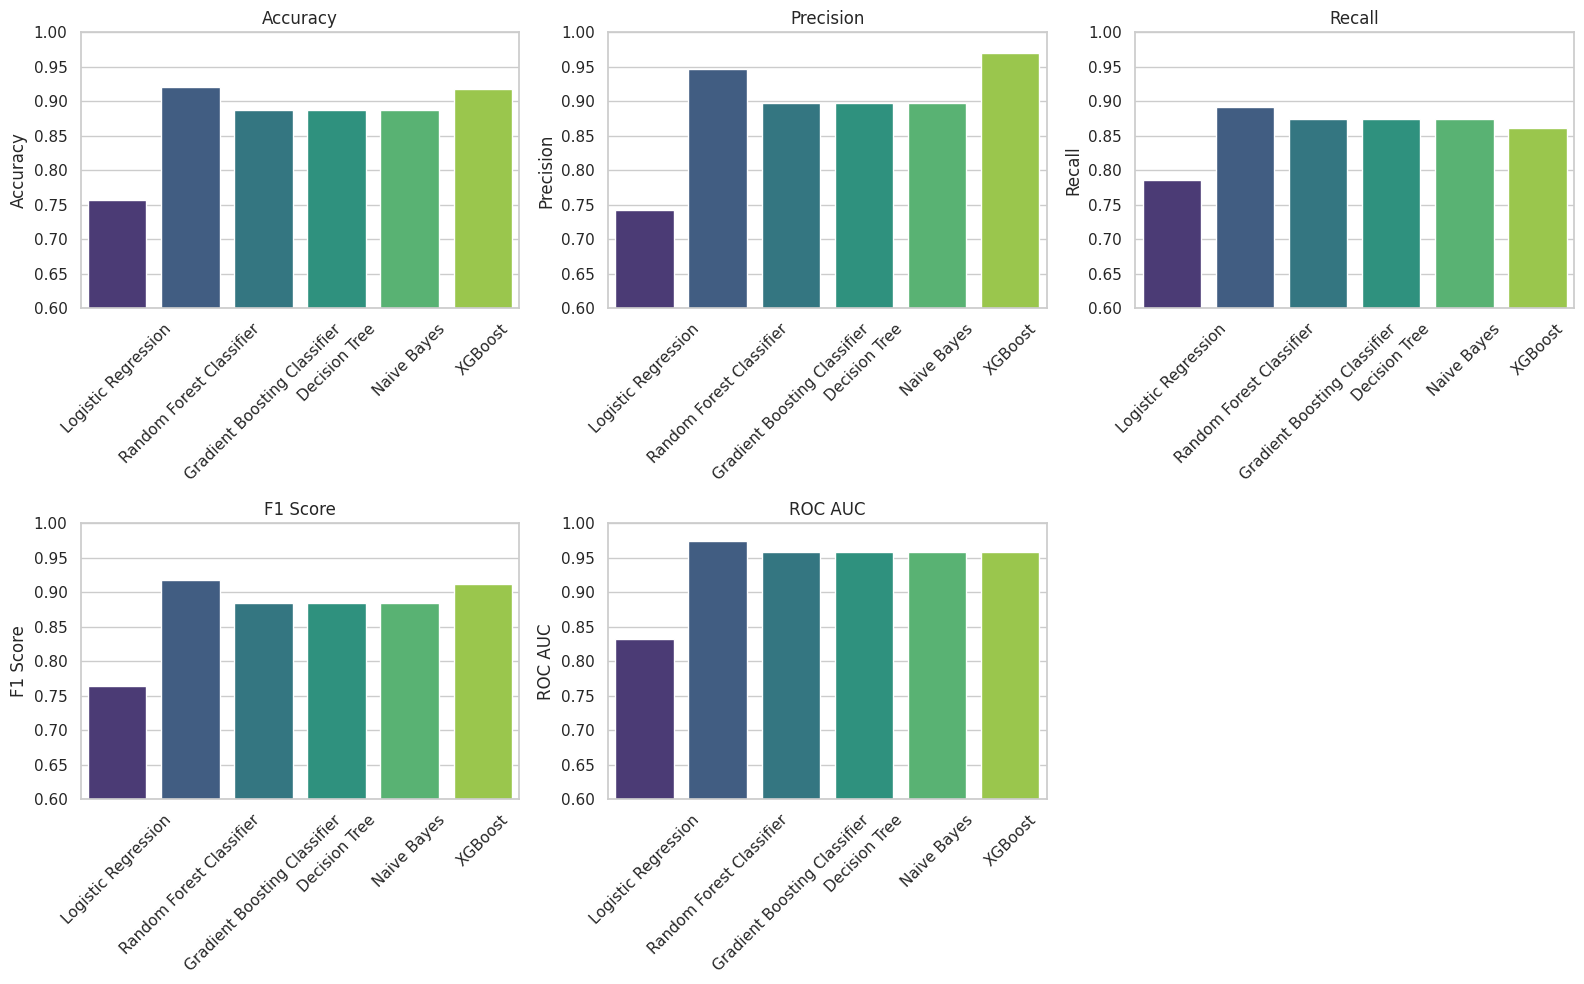

In [ ]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']

plt.figure(figsize=(16, 10))
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 3, i)
    sns.barplot(x='Model', y=metric, data=results_df, palette='viridis')
    plt.title(metric)
    plt.xticks(rotation=45)
    plt.ylim(0.6, 1.0)
    plt.ylabel(metric)
    plt.xlabel("")

plt.tight_layout()
plt.show()

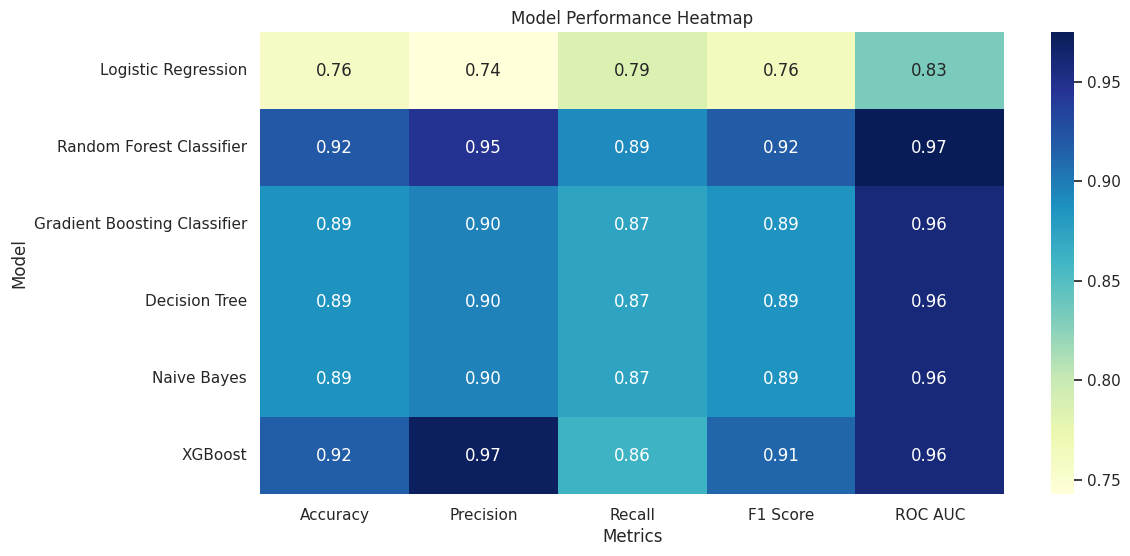

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(results_df.set_index('Model'), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Model Performance Heatmap")
plt.ylabel("Model")
plt.xlabel("Metrics")
plt.show()

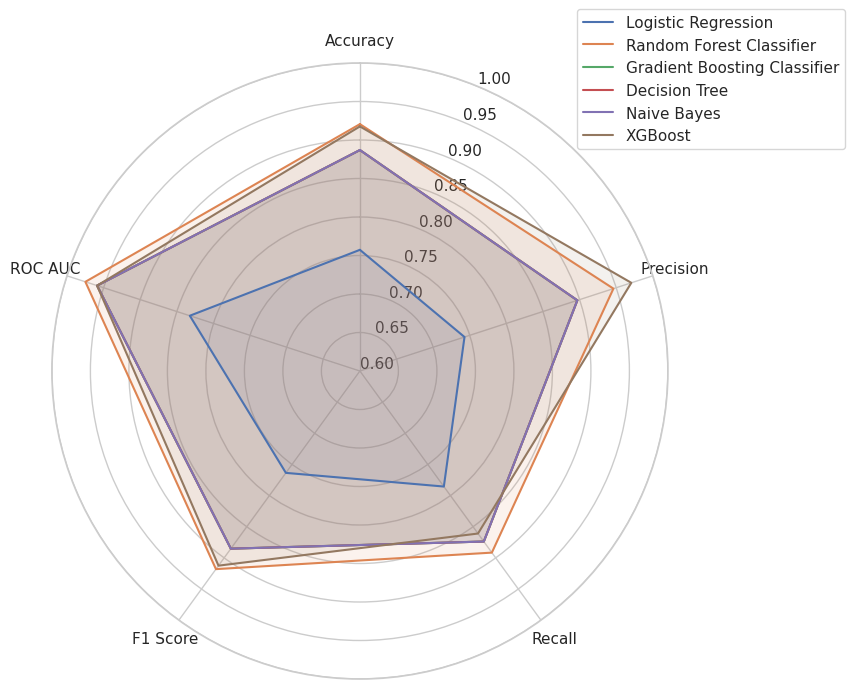

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare radar chart
labels = metrics
num_vars = len(labels)

# Convert to radians for circular plot
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Create figure
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot for each model
for i, row in results_df.iterrows():
    values = row[metrics].tolist()
    values += values[:1]  # repeat first value to close the circle
    ax.plot(angles + [angles[0]], values, label=row['Model'])
    ax.fill(angles + [angles[0]], values, alpha=0.1)

# Add labels
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
plt.xticks(angles, labels)
ax.set_ylim(0.6, 1.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()

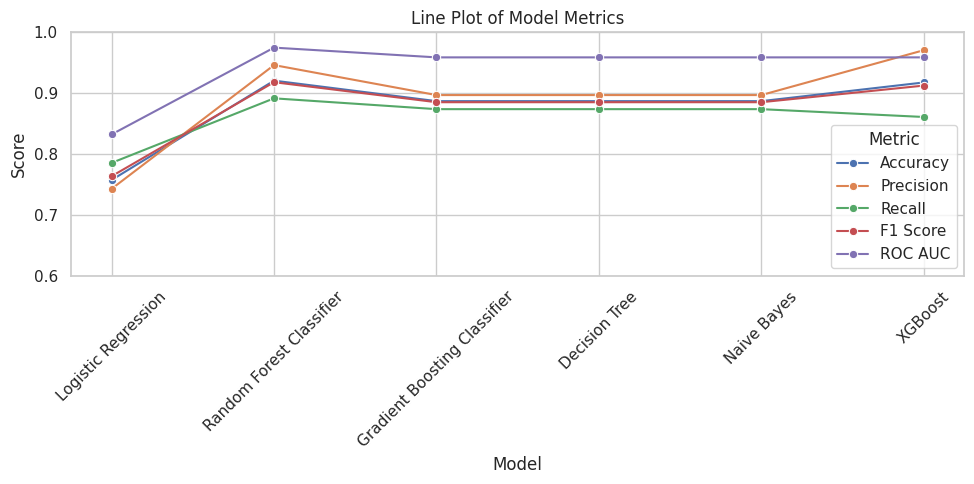

In [ ]:
melted_df = results_df.melt(id_vars="Model", var_name="Metric", value_name="Score")

plt.figure(figsize=(10, 5))
sns.lineplot(data=melted_df, x="Model", y="Score", hue="Metric", marker="o")
plt.xticks(rotation=45)
plt.title("Line Plot of Model Metrics")
plt.ylim(0.6, 1.0)
plt.tight_layout()
plt.show()